In [1]:
gz## Imports
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [38]:
## !wget www.di.ens.fr/~lelarge/MNIST.tar.gz

In [3]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [4]:
#torchvision.datasets.MNIST(root="./",download=True)
dataset = MNIST(root = './', download = True)

In [5]:
#check total items in dataset
print(len(dataset))


60000


Label: 4


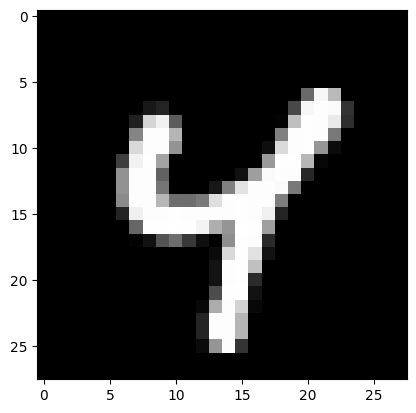

In [6]:
#change index of dataset to see different image
image, label = dataset[1008]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

---

## Loading the MNIST data with transformation applied while loading


In [7]:
## MNIST dataset(images and labels)
mnist_dataset = MNIST(root = './', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


In [8]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


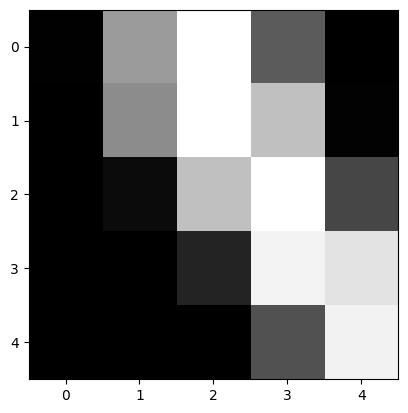

In [10]:
## Plot the image of the tensor
plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

---

## Training and Validation Datasets

In [11]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


---

While building a machine learning/Deep learning models, it is common to split the dataset into 3 parts:

Training set - The part of the data will be used to train the model,compute the loss and adjust the weights of the model using gradient descent.
Validation set - This part of the dataset will be used to evalute the traing model, adjusting the hyperparameters and pick the best version of the model.
Test set - This part of the dataset is used to final check the model predictions on the new unseen data to evaluate how well the model is performing.

In [12]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

---

## Defining the Logistic Model

In [13]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb.shape)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0058, -0.0153,  0.0020,  ...,  0.0161,  0.0284,  0.0050],
         [-0.0076, -0.0136, -0.0050,  ..., -0.0352, -0.0064,  0.0166],
         [ 0.0145,  0.0242,  0.0171,  ...,  0.0327,  0.0161, -0.0354],
         ...,
         [ 0.0074, -0.0118,  0.0196,  ..., -0.0106,  0.0092, -0.0074],
         [ 0.0252, -0.0182,  0.0118,  ...,  0.0348, -0.0305, -0.0075],
         [ 0.0102,  0.0303,  0.0005,  ...,  0.0207,  0.0129,  0.0172]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0129,  0.0283,  0.0142, -0.0208, -0.0099, -0.0122, -0.0254,  0.0117,
         -0.0339,  0.0042], requires_grad=True)]

In [14]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

torch.Size([128, 784])
tensor([[ 8.7887e-02, -1.0449e-01,  1.3694e-01,  ..., -3.5510e-02,
         -1.5463e-01, -1.1578e-01],
        [ 3.3293e-02, -8.8466e-02, -1.0185e-01,  ..., -2.7706e-02,
         -1.4333e-01, -1.8445e-01],
        [ 3.4602e-03, -9.9615e-02,  1.1379e-01,  ..., -1.2839e-01,
          5.0906e-02,  2.8556e-02],
        ...,
        [ 9.9824e-04,  1.8791e-01,  3.0241e-01,  ...,  1.1161e-03,
         -1.5725e-01, -8.1410e-02],
        [-2.5101e-03,  1.2919e-01,  1.2612e-01,  ..., -1.5410e-04,
         -6.7245e-02,  3.9038e-02],
        [-1.4081e-01, -3.4715e-02,  5.9111e-02,  ..., -1.2769e-01,
         -3.5597e-01,  1.4950e-02]], grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.0879, -0.1045,  0.1369,  0.1694,  0.3293, -0.1573, -0.3172, -0.0355,
         -0.1546, -0.1158],
        [ 0.0333, -0.0885, -0.1019, -0.0697,  0.1621, -0.1590, -0.0346, -0.0277,
         -0.1433, -0.1844]])


In [15]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## checking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.1091, 0.0900, 0.1146, 0.1183, 0.1389, 0.0854, 0.0728, 0.0964, 0.0856,
         0.0890],
        [0.1094, 0.0969, 0.0956, 0.0987, 0.1244, 0.0903, 0.1022, 0.1029, 0.0917,
         0.0880]])


Sum:  0.9999999403953552


tensor([4, 4, 2, 9, 2, 7, 4, 9, 2, 4, 4, 3, 4, 4, 9, 4, 4, 4, 2, 2, 4, 3, 2, 2,
        4, 2, 4, 4, 3, 4, 4, 4, 4, 2, 9, 2, 3, 1, 4, 4, 3, 6, 0, 4, 4, 4, 4, 4,
        2, 5, 4, 4, 4, 0, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 4, 3, 3, 4, 2, 4, 4, 2,
        2, 2, 4, 3, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 1, 4, 1, 3, 2, 4, 1, 2,
        4, 4, 4, 4, 9, 4, 0, 4, 4, 2, 4, 0, 2, 4, 1, 2, 4, 2, 4, 4, 0, 2, 4, 4,
        4, 4, 4, 2, 0, 2, 4, 4])


tensor([0.1389, 0.1244, 0.1148, 0.1472, 0.1398, 0.1210, 0.1215, 0.1179, 0.1281,
        0.1406, 0.1536, 0.1338, 0.1689, 0.1295, 0.1243, 0.1354, 0.1362, 0.1387,
        0.1348, 0.1260, 0.1528, 0.1318, 0.1307, 0.1384, 0.1299, 0.1365, 0.1838,
        0.1281, 0.1227, 0.1251, 0.1438, 0.1407, 0.1306, 0.1186, 0.1274, 0.

In [16]:
labels

tensor([9, 6, 9, 3, 7, 5, 7, 2, 7, 6, 7, 5, 0, 8, 1, 8, 8, 9, 1, 7, 7, 8, 1, 9,
        2, 9, 4, 8, 3, 6, 9, 6, 5, 1, 3, 2, 8, 1, 6, 4, 6, 2, 9, 8, 6, 3, 4, 0,
        6, 6, 5, 8, 7, 5, 6, 2, 1, 7, 3, 4, 5, 9, 9, 2, 2, 0, 2, 4, 1, 8, 3, 4,
        7, 1, 4, 2, 7, 0, 5, 2, 9, 9, 0, 1, 7, 7, 1, 7, 6, 2, 9, 7, 9, 6, 1, 2,
        2, 5, 0, 6, 8, 4, 3, 3, 9, 1, 5, 5, 5, 4, 0, 5, 6, 1, 0, 5, 4, 1, 0, 0,
        7, 9, 0, 7, 0, 1, 7, 0])

---

## Evaluation Metric and Loss Function

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.1250)


Loss Function:  <function cross_entropy at 0x75dbca5bf2e0>


tensor(2.3375, grad_fn=<NllLossBackward0>)


---

### Training the Model

In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
model = MnistModel()

In [19]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [20]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2872304916381836, 'val_acc': 0.08900316804647446}

In [21]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9334, val_acc: 0.6240
Epoch [1], val_loss: 1.6701, val_acc: 0.7198
Epoch [2], val_loss: 1.4733, val_acc: 0.7526
Epoch [3], val_loss: 1.3246, val_acc: 0.7742
Epoch [4], val_loss: 1.2100, val_acc: 0.7882


In [22]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1198, val_acc: 0.8008
Epoch [1], val_loss: 1.0473, val_acc: 0.8091
Epoch [2], val_loss: 0.9879, val_acc: 0.8166
Epoch [3], val_loss: 0.9384, val_acc: 0.8198
Epoch [4], val_loss: 0.8965, val_acc: 0.8241


In [23]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8607, val_acc: 0.8283
Epoch [1], val_loss: 0.8296, val_acc: 0.8322
Epoch [2], val_loss: 0.8023, val_acc: 0.8348
Epoch [3], val_loss: 0.7782, val_acc: 0.8371
Epoch [4], val_loss: 0.7567, val_acc: 0.8398


In [24]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7375, val_acc: 0.8417
Epoch [1], val_loss: 0.7201, val_acc: 0.8438
Epoch [2], val_loss: 0.7043, val_acc: 0.8474
Epoch [3], val_loss: 0.6900, val_acc: 0.8489
Epoch [4], val_loss: 0.6768, val_acc: 0.8506


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

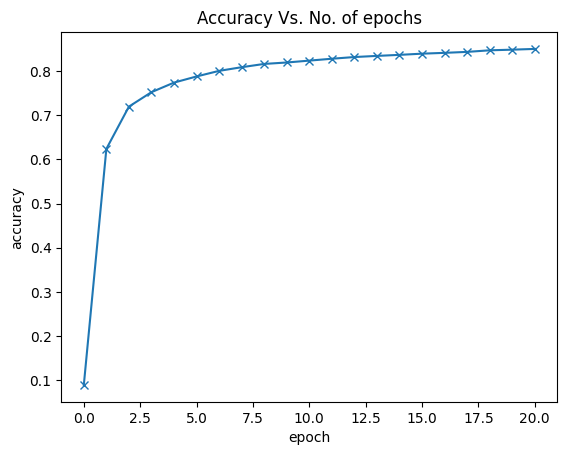

In [25]:
## Replace these values with your result
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')


---
### Testing with individual images

In [26]:
## Define the test dataset
test_dataset = MNIST(root = './', train = False, transform = transforms.ToTensor())
len(test_dataset)

10000

shape:  torch.Size([1, 28, 28])
Label:  7


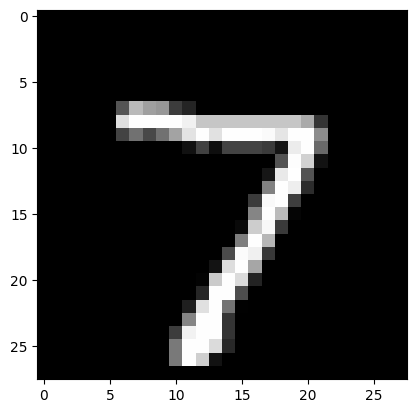

In [27]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [28]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [29]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 7 , Predicted : 7


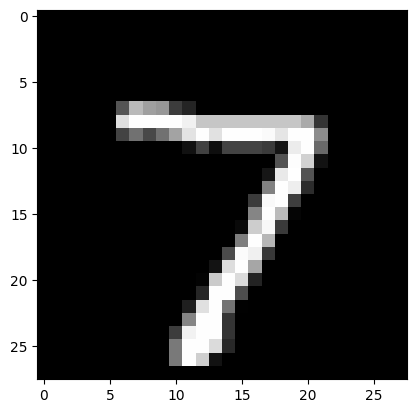

In [30]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

Label: 9 ,Predicted: 9


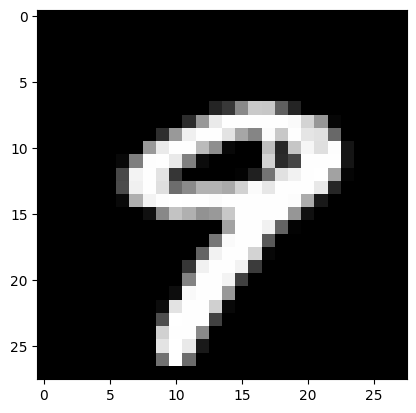

In [31]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 9 ,Predicted: 9


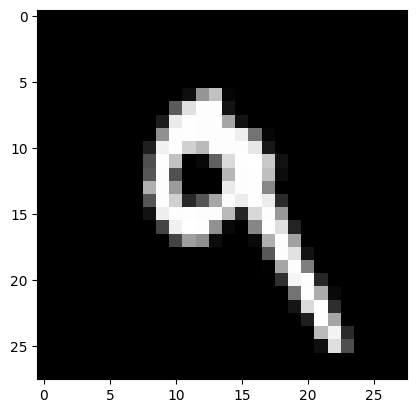

In [32]:
img, label = test_dataset[7]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

In [33]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6406567692756653, 'val_acc': 0.861035168170929}

---

In [34]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [35]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0147,  0.0228,  0.0107,  ..., -0.0072,  0.0004, -0.0140],
                      [-0.0094,  0.0245,  0.0306,  ..., -0.0352, -0.0207,  0.0239],
                      [-0.0274,  0.0296, -0.0313,  ...,  0.0206, -0.0255, -0.0339],
                      ...,
                      [ 0.0191,  0.0356,  0.0242,  ...,  0.0098, -0.0101, -0.0341],
                      [ 0.0165, -0.0244,  0.0121,  ...,  0.0118, -0.0085,  0.0011],
                      [-0.0131, -0.0351,  0.0110,  ...,  0.0316, -0.0036, -0.0074]])),
             ('linear.bias',
              tensor([-0.0454,  0.1309, -0.0092, -0.0650,  0.0076,  0.0762,  0.0229,  0.0659,
                      -0.1131, -0.0176]))])

In [36]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0147,  0.0228,  0.0107,  ..., -0.0072,  0.0004, -0.0140],
                      [-0.0094,  0.0245,  0.0306,  ..., -0.0352, -0.0207,  0.0239],
                      [-0.0274,  0.0296, -0.0313,  ...,  0.0206, -0.0255, -0.0339],
                      ...,
                      [ 0.0191,  0.0356,  0.0242,  ...,  0.0098, -0.0101, -0.0341],
                      [ 0.0165, -0.0244,  0.0121,  ...,  0.0118, -0.0085,  0.0011],
                      [-0.0131, -0.0351,  0.0110,  ...,  0.0316, -0.0036, -0.0074]])),
             ('linear.bias',
              tensor([-0.0454,  0.1309, -0.0092, -0.0650,  0.0076,  0.0762,  0.0229,  0.0659,
                      -0.1131, -0.0176]))])

In [37]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6406567692756653, 'val_acc': 0.861035168170929}